In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
from matplotlib import style
style.use('ggplot')
import tweepy
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import wordnet

In [2]:
# Authentication
consumer_key = "LFWaB0IiFY3ubTWZEbRpCESy4"
consumer_sec = "GMCJwqgphQfUm7KdaYBuxPDfgmMcqk9QibsMNIFW9J9EXGdrkH"
access_token = "1562360537496711168-utZWhPYz0i5ujGfNVwm9J0yLQwRLOT"
access_token_sec = "zBXjUZ8Hf2NrwLL1URZXmk3umVB3BeBrT1idVv8RnAp2x"
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
auth.set_access_token(access_token, access_token_sec)
api = tweepy.API(auth)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = 100
#tweet_data=tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
tweet_data = api.search_tweets(q = keyword, count = 200)

Please enter keyword or hashtag to search: donald trump


In [3]:
df=[]
for tweet in tweet_data:
 df.append(tweet.text)
df= pd.DataFrame(df)
df

,0
0,RT @MayflowerCruise: Trump just got off his pl...
1,RT @HStarshot: Donald Trump just referred to “...
2,"RT @CREWcrew: Rest assured, if Donald Trump an..."
3,RT @ericareport: Donald Trump is a white supre...
4,"RT @reedgalen: When you drive @Tesla, you're r..."
...,...
95,RT @FLVoiceNews: WATCH: As Donald Trump ends M...
96,@willys_cj2a @tiffanyandsadie Donald trump fir...
97,Why I now believe Donald Trump will regain the...
98,RT @donwinslow: Donald Trump still has stolen ...


In [4]:
df.columns=["tweet"]

In [5]:
text_df=df

In [6]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [7]:
def data_processing(text):
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text=text.translate(str.maketrans("","",string.punctuation))
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(alphaPattern, " ", text)
    text = re.sub(sequencePattern, seqReplacePattern, text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    #ps=PorterStemmer()
    #stemmed_words=[ps.stem(w) for w in filtered_text]
    
    lm= WordNetLemmatizer()
    lemmatized = [lm.lemmatize(word,wordnet.VERB) for word in filtered_text]
    
    return " ".join(lemmatized)

In [8]:
data_processing("I hate twitter")

'hate twitter'

In [9]:
text_df['tweet'] = text_df['tweet'].apply(data_processing)

In [10]:
text_df.head()

,tweet
0,rt mayflowercruise trump get plane ohio speak ...
1,rt hstarshot donald trump refer take white hou...
2,rt crewcrew rest assure donald trump announce ...
3,rt ericareport donald trump white supremacist ...
4,rt reedgalen drive tesla youre rid elonmusk do...


In [11]:
text_df.shape

(100, 1)

In [12]:
text_df = text_df.drop_duplicates('tweet')

In [13]:
text_df.shape

(61, 1)

In [14]:
print(text_df['tweet'].iloc[0],"\n")
print(text_df['tweet'].iloc[1],"\n")
print(text_df['tweet'].iloc[2],"\n")
print(text_df['tweet'].iloc[3],"\n")
print(text_df['tweet'].iloc[4],"\n")

rt mayflowercruise trump get plane ohio speak soon live listen 

rt hstarshot donald trump refer take white house 2024 minutes later tease big announcement maralago 

rt crewcrew rest assure donald trump announce hes run presidency well file challenge 14th amendment whi 

rt ericareport donald trump white supremacist agree yes 

rt reedgalen drive tesla youre rid elonmusk donald trump 



In [15]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   61 non-null     object
dtypes: object(1)
memory usage: 976.0+ bytes


In [16]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
text_df['polarity'] = text_df['tweet'].apply(polarity)

In [18]:
text_df.head()

,tweet,polarity
0,rt mayflowercruise trump get plane ohio speak ...,0.136364
1,rt hstarshot donald trump refer take white hou...,0.000000
2,rt crewcrew rest assure donald trump announce ...,0.000000
3,rt ericareport donald trump white supremacist ...,0.000000
4,rt reedgalen drive tesla youre rid elonmusk do...,0.000000


In [19]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [20]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [21]:
text_df.head()

,tweet,polarity,sentiment
0,rt mayflowercruise trump get plane ohio speak ...,0.136364,Positive
1,rt hstarshot donald trump refer take white hou...,0.000000,Neutral
2,rt crewcrew rest assure donald trump announce ...,0.000000,Neutral
3,rt ericareport donald trump white supremacist ...,0.000000,Neutral
4,rt reedgalen drive tesla youre rid elonmusk do...,0.000000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

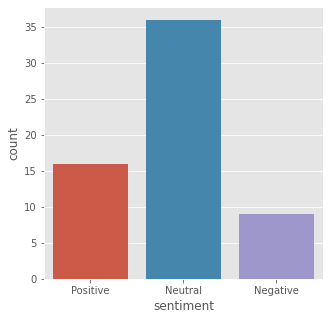

In [22]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

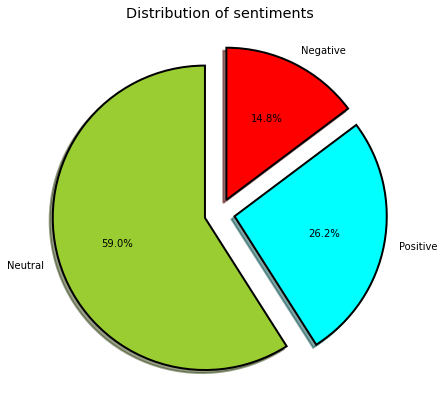

In [23]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "cyan", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [24]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,tweet,polarity,sentiment
39,blitz donald trump thoughtful harry reid dista...,0.500000,Positive
55,im really love trump threaten tweet garner 100...,0.500000,Positive
95,rt flvoicenews watch donald trump end miami ra...,0.500000,Positive
12,rt stevenbeschloss one note midterms nov 9 wou...,0.416667,Positive
7,rt mehdirhasan kari lake jr mock laugh donald ...,0.300000,Positive


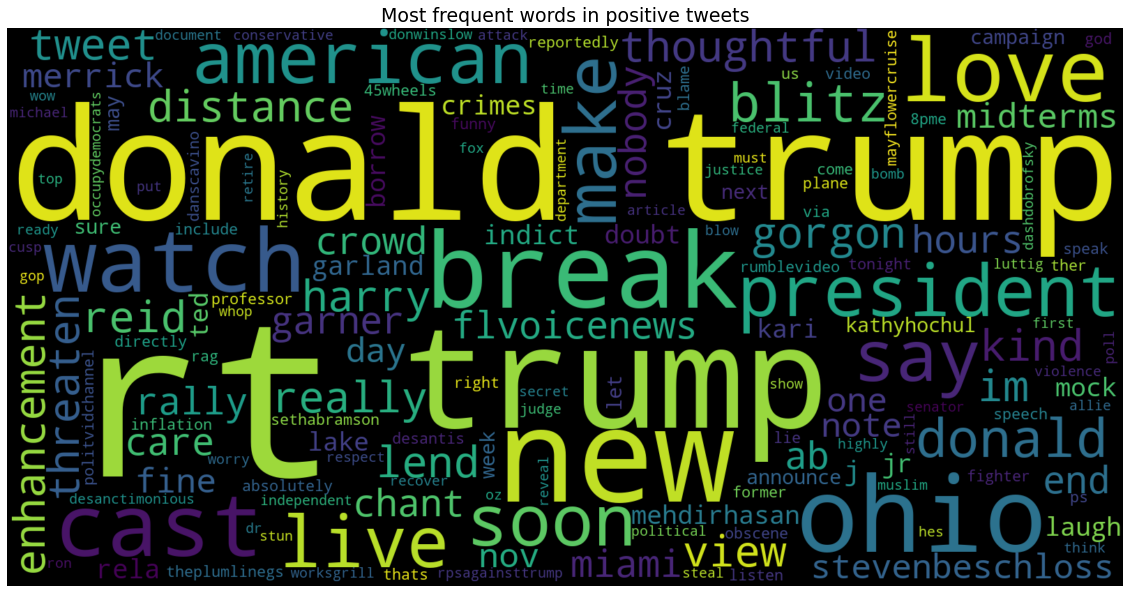

In [25]:
pos_tweet = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(pos_tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [26]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,tweet,polarity,sentiment
71,rt thenationalnews cop27 imrankhan oman trump ...,-0.083333,Negative
27,rt sethabramson support troop donald trump und...,-0.100000,Negative
52,rt rpsagainsttrump donald trump say hed make b...,-0.104167,Negative
80,rt thetnholler new homeland security admit try...,-0.137879,Negative
36,rt kikiallus piyushmittal keith richards know ...,-0.300000,Negative


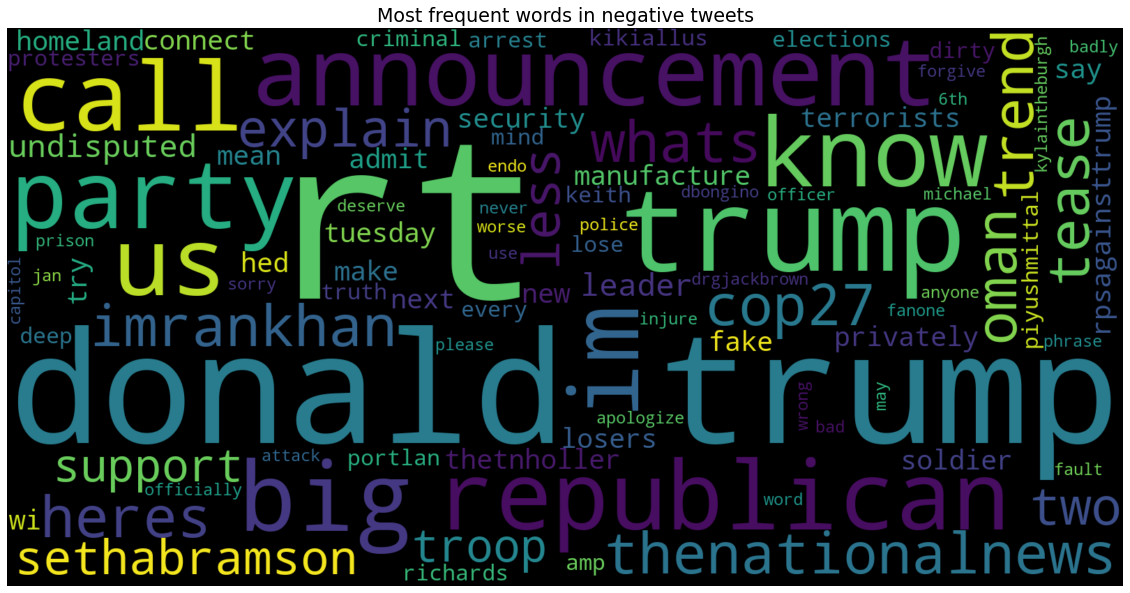

In [27]:
neg_tweet = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(neg_tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [28]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['tweet'])

In [29]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 1094

First 20 features:
 ['100', '100 hours', '14th', '14th amendment', '15', '15 florida', '15 kas', '15 listopa', '15 maralago', '15 novembre', '15 say', '15th', '15th maralago', '175', '175 lie', '2016', '2024', '2024 ba', '2024 election', '2024 maralago']


In [30]:
X = text_df['tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
print("Size of X_train:", (X_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of X_test:", (X_test.shape))
print("Size of y_test:", (y_test.shape))

Size of X_train: (48, 1094)
Size of y_train: (48,)
Size of X_test: (13, 1094)
Size of y_test: (13,)


In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
accuracy=logreg.score(X_test,y_test)
print('Accuracy:',round(accuracy,2))

Accuracy: 0.54


In [34]:
print("Confusion Matrix of Logistic Regression Model")
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print("Classification report of Logistic Regression ")
print(classification_report(y_test, logreg_pred))

Confusion Matrix of Logistic Regression Model
[[0 2 0]
 [0 7 0]
 [0 4 0]]


Classification report of Logistic Regression 
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.54      1.00      0.70         7
    Positive       0.00      0.00      0.00         4

    accuracy                           0.54        13
   macro avg       0.18      0.33      0.23        13
weighted avg       0.29      0.54      0.38        13



In [35]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
SVC_pred = SVCmodel.predict(X_test)
accuracy=SVCmodel.score(X_test,y_test)
print('Accuracy:',round(accuracy,2))

Accuracy: 0.54


In [36]:
print("Confusion Matrix of Logistic Regression Model")
print(confusion_matrix(y_test, SVC_pred))
print("\n")
print("Classification report of Logistic Regression ")
print(classification_report(y_test, SVC_pred))

Confusion Matrix of Logistic Regression Model
[[0 2 0]
 [0 7 0]
 [0 4 0]]


Classification report of Logistic Regression 
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.54      1.00      0.70         7
    Positive       0.00      0.00      0.00         4

    accuracy                           0.54        13
   macro avg       0.18      0.33      0.23        13
weighted avg       0.29      0.54      0.38        13



In [37]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
SVC_pred = SVCmodel.predict(X_test)
accuracy=SVCmodel.score(X_test,y_test)
print('Accuracy:',round(accuracy,2))

Accuracy: 0.54
